# Classical Statistical Inference: Confidence intervals

## Table of Content

- II. What is statistical inference ?
    * II.1 Point estimate: See [Frequentist_inference_01.ipynb](Frequentist_inference_01.ipynb)
    * II.2 [Confidence interval](#II.2-Confidence-interval:)
        - II.2.1 Normal distribution with a known variance: See [Frequentist_inference_02.ipynb](Frequentist_inference_02.ipynb)
        - II.2.2. Interpretation of CI: See [Frequentist_inference_02.ipynb](Frequentist_inference_02.ipynb)
        - II.2.3 Normal distribution with an unknown variance: See [Frequentist_inference_02.ipynb](Frequentist_inference_02.ipynb)
        - II.2.4 [Confidence interval for variances](#II.2.4-Confidence-interval-for-variances)
        - II.2.5 [Confidence interval between 2 means](#II.2.5.-CI-for-difference-between-2-means---)
        - II.2.6 [Confidence interval for proportions](#II.2.6-Confidence-intervals-for-proportions)
        
    * II.3 Hypothesis testing: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb) 
    * II.4 Uncertainty calculation using Monte-Carlo method. See [Frequentist_inference_Monte_Carlo.ipynb](Frequentist_inference_Monte_Carlo.ipynb)
    * II.5 Bootstrap and Jacknife: See [Frequentist_inference_Bootstrap.ipynb](Frequentist_inference_Bootstrap.ipynb)  
    * II.6 Wrap up: Various approaches of hypothesis testing: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb)
 

- X. [References and supplementary material](#X)

In [1]:
# Some initialisation for interactive cells
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### II.2.4 Confidence interval for variances

We have seen that if random variables $\{x_i\}$ are normally distributed with mean $\mu$ and variance $\sigma$, then $(n-1)\, \hat{\sigma}^2 / \sigma^2$  is distributed as a $\chi^2(n-1)$ distribution (where $\hat{\sigma}^2$ is the variance estimated from the sample). 

Once we know the distribution of our random variable, it becomes easy to calculate the confidence interval.   
This time, we need to calculate $c_{1-\alpha/2} = \chi^2_{1-\alpha/2}(n-1)$, $c_{\alpha/2} = \chi^2_{\alpha/2}(n-1)$.   

c_{1-alpha/2} = 16.92, c_{alpha/2} = 3.33


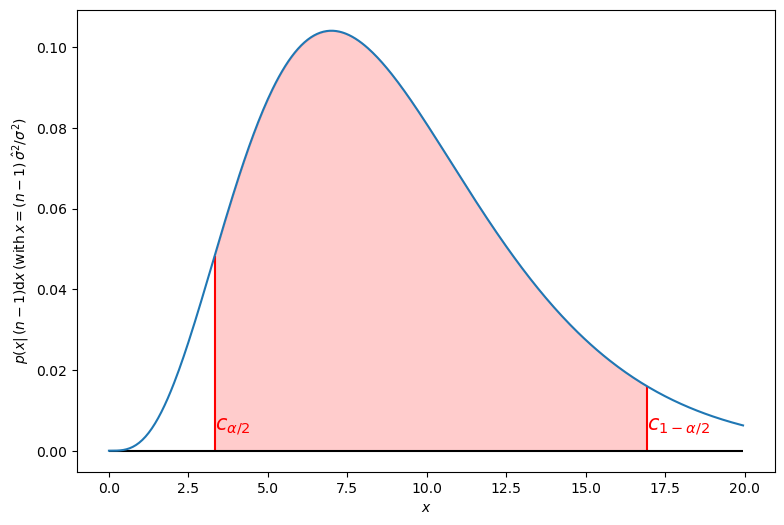

In [2]:
n = 10
alpha=0.1
x = np.arange(0,20, 0.05)
chi2dist = scipy.stats.chi2(n-1)
plt.figure(figsize=(9,6))
plt.plot(x, chi2dist.pdf(x))
ca1, ca2 = chi2dist.ppf(1-alpha/2), chi2dist.ppf(alpha/2)
cv1 = plt.vlines(ca1, 0, chi2dist.pdf(ca1), color='red')
cv2 = plt.vlines(ca2, 0, chi2dist.pdf(ca2), color='red')
cm = plt.vlines(0, 0, chi2dist.pdf(0), linestyle = '--', color='red')
plt.fill_between(np.linspace(ca1, ca2, 100), 0, chi2dist.pdf(np.linspace(ca1, ca2, 100)), color='red', alpha=0.2)
print('c_{1-alpha/2} = %.2f, c_{alpha/2} = %.2f' % (ca1, ca2))
plt.hlines(0, x.min(), x.max(), color='black')
plt.annotate(r'$c_{\alpha/2}$', (ca2, 0.005) , fontsize=15, color='red')
plt.annotate(r'$c_{1-\alpha/2}$', (ca1, 0.005) , fontsize=15, color='red') 
plt.ylabel(r'$p( x | \, (n-1 ) {\rm{d}}x \, ({\rm {with}} \, x= (n-1)\, \hat{\sigma}^2 / \sigma^2) $')
plt.xlabel(r'$x$');

To get the CI on $\sigma^2$ we can do the following: 

We have: 
$$
p(c_{\alpha/2} \leq (n-1)\, \hat{\sigma}^2 / \sigma^2 \leq c_{1-\alpha/2}) = 1-\alpha
$$

We can rewrite:
$$
c_{\alpha/2} \leq \frac{(n-1)\, \hat{\sigma}^2} {\sigma^2} \leq c_{1-\alpha/2}
$$

as

$$
\frac {c_{\alpha/2} }{( (n-1)\, \hat{\sigma}^2)}  \leq \, \frac{1}{\sigma^2}  \leq \frac {c_{1-\alpha/2}}{( (n-1) \, \hat{\sigma}^2)}
$$

hence:
$$
\frac {(n-1)} {c_{1-\alpha/2} } \, \hat{\sigma}^2 \leq \, \sigma^2 \leq \frac { (n-1) }{c_{\alpha/2}} \, \hat{\sigma}^2
$$

Therefore, the confidence interval for the variance $\sigma^2$ is:

$$
CI_{\sigma^2} = \left[\frac{(n-1)}{c_{1-\alpha/2}}\, \hat{\sigma}^2, \frac{(n-1)}{c_{\alpha/2}}\, \hat{\sigma}^2 \right]
$$

For the standard deviation, it is sufficient to take the square root of the variance:

$$
CI_\sigma = \left[\sqrt{\frac{(n-1)}{c_{1-\alpha/2}}} \, \hat{\sigma}, \sqrt{\frac{(n-1)}{c_{\alpha/2}}}\, \hat{\sigma} \right]
$$

**Example:**

Let's consider the ensemble of 10 points drawn from a normal distribution $\mathcal{N}(\mu=20, \sigma=3)$ in the previous example. Let's estimate a 95% confidence interval on the variance:

In [3]:
np.random.seed(12356)

alpha = 0.05
# Imagine that we have 10 data points drawn from a gaussian of mean 20, and width 3
mu, sigma = 20., 3.
Npts = 10
norm = scipy.stats.norm(mu, sigma)
x_sample = norm.rvs(Npts)    # We generate our fake sample, i.e. draw 10 points from the Gaussian
x_mean = np.mean(x_sample)   # we calculate the mean of our random variable
x_sigma = np.std(x_sample, ddof=1) # Estimated stdev of the distribution

In [4]:
# Chi^2 distribution of the std dev
chi_std = scipy.stats.chi2(df=Npts-1)  

ca1, ca2 = chi_std.ppf(1-alpha/2.), chi_std.ppf(alpha/2.)
a1, a2 = np.sqrt( (Npts-1) / ca1 ) * x_sigma , np.sqrt( (Npts-1) / ca2 ) * x_sigma
print("My %.2f percents confidence interval for the std %.2f is [%.2f,%.2f] " %((1-alpha)*100., x_sigma, a1, a2) )

My 95.00 percents confidence interval for the std 3.14 is [2.16,5.73] 


In [5]:
# Using directly chi2.interval
CI = chi_std.interval(1-alpha)

a2b, a1b = np.sqrt( (Npts-1) / CI[0] ) * x_sigma , np.sqrt( (Npts-1) / CI[1] ) * x_sigma   # stdev
a2var, a1var = ((Npts-1) / CI[0])  * x_sigma**2 , ((Npts-1) / CI[1])  * x_sigma**2      # variance
print('CI using scipy.stats.chi2.interval:  [%.2f, %.2f]' % (a1b, a2b) )
print('CI for the variance:  [%.2f, %.2f]' % (a1var, a2var) )

CI using scipy.stats.chi2.interval:  [2.16, 5.73]
CI for the variance:  [4.66, 32.80]


#### II.2.5. CI for difference between 2 means   <a class="anchor" id="CImean-diff"></a>

Imagine you measure positions of 2 images of a lensed quasar but you are interested in drawing a CI on the relative astrometry (i.e. difference of positions), then this is the way to go:

* If the two means are drawn from **2 populations with the same variance** ($\{X_i\}$ with $n$ points, and $\{Y_j\}$ with $m$ points), the confidence interval is: 

$$
(\bar{X} - \bar{Y}) \, \pm \, t_{\alpha/2, n+m-2} \, \hat{\sigma}_p \sqrt{ \frac{1}{m} + \frac{1}{n}}
$$

where $\hat{\sigma}^2_p$ is the *pooled variance* (an unbiased estimator of the variance of the difference of the means):

$$
\hat{\sigma}^2_p = \frac{(n-1) \, \hat{\sigma}_X^2 + (m-1) \, \hat{\sigma}_Y^2 } {n+m-2} 
$$

* When the **two populations have different variances**, then, one uses what is called a **Welsh confidence interval**: 

$$
(\bar{X} - \bar{Y}) \, \pm \, t_{\alpha/2, r} \, \sqrt{ \frac{\hat{\sigma}^2_X}{m} + \frac{\hat{\sigma}^2_Y}{n}}
$$

where the degrees of freedom are approximated by: 

$$
r =  \frac { \left(\frac{ \hat{\sigma}^2_X } {n} + \frac{\hat{\sigma}^2_Y }{m} \right)^2  } {\frac{ (\hat{\sigma}^2_X / n)^2} {n-1} + \frac{ (\hat{\sigma}^2_Y / m)^2}{m-1} }
$$

When $r$ is not an integer, you just take the integer portion of $r$. 

**Demonstration for the case where the 2 populations have the same variance**: 

If we consider two samples $\{X_i\}$ ($i=1, ..., m$) , $\{Y_j\}$ ($j=1, ..., n$), we know that their mean $\bar{X}$ and $\bar{Y}$ follow a normal distribution $\bar{X}$ ~ $N(\mu_X, \sigma_X / m)$ and $\bar{Y}$ ~ $N(\mu_Y, \sigma_Y / n)$. 

Considering that the means $\bar{X}$ and ${\bar{Y}}$ are two random variables, we can rewrite the difference $\bar{W} = \bar{X} - \bar{Y}$ and use the error propagation formula to infer that the error on $\bar{W}$ is $\sqrt{\sigma^2_X / m  + \sigma^2_Y / n} = \sqrt{\sigma^2 / m  + \sigma^2 / n}$, if $\sigma_X = \sigma_Y = \sigma$. 
We can make a change of variable to get a normalized random variable: 
$$
Z = \frac{ (\bar{X} - \bar{Y}) - (\mu_{X} - \mu_{Y}) }{ \sqrt{ \frac{1}{m} + \frac{1}{n} } \, \sigma } 
$$

This random variable will follow a normal distribution $\mathcal{N}(0, 1)$. 

The normality of the two random variable ${\bar{X}}$ and ${\bar{Y}}$ also implies that  $(n-1) \, \hat{\sigma}^2_X / \sigma^2  $ follows a $\chi^2_{n-1}$ and $(m-1) \hat{\sigma}^2_Y \, / \, \sigma^2  $ follows a $\chi^2_{m-1}$. 

The independence of the two samples implies that when we add those two chi-square random variables, we get another chi-square random variable with the degrees of freedom (i.e. $n−1$ and $m−1$) added. 
So, defining a new random variable $U$:

$$
U = \frac {(n-1) \hat{\sigma}^2_X }{\sigma^2} + \frac {(m-1) \hat{\sigma}^2_Y }{\sigma^2}
$$

This random variable will follow a $\chi^2$ distribution with $(m+n-2)$ degrees of freedom. 

We know, from the definition of the student distribution that the following variable:

$$
T = \frac{Z}{\sqrt{U / (n+m-2) }} 
$$

follows a student distribution. 

Substituting the values of $Z$ and $U$, we get (after a few lines of algebra and noting that the pooled variance $\hat{\sigma}^2_p = \frac{(n-1) \, \hat{\sigma}_X^2 + (m-1) \, \hat{\sigma}_Y^2 } {n+m-2} $ ) :

$$
T = \frac{ (\bar{X} - \bar{Y}) - (\mu_{X} - \mu_{Y}) }{\sqrt{ \frac{1}{m} + \frac{1}{n} } \, \hat{\sigma}^2_p }
$$

follows a student distribution with $m+n-2$ dof (i.e. $t_{m+n-2}$).  

#### II.2.6 Confidence intervals for proportions

Proportions are also commonly studied in astronomy. You may for example observe a sample of 100 galaxies and quote the fraction of galaxies of a specific type (e.g. elliptical) in your sample together with a confidence interval on that quantity/statistics (that reflects the size of your sample).

In many cases, you can estimate your CI for proportions, in the same way as we did for normal distribution. Indeed, if we calculate the proportion of galaxies to be of a given type, we basically calculate the sum of the number of galaxies of the desired type and normalize by the sample size. If we define a random variable $X_i$ such that:
* $X_i = 1 $ if the galaxy is elliptical 
* $X_i = 0 $ if the galaxy is not an elliptical 

then, our estimate of the proportion of elliptical galaxies is :

$$
\hat{p} = \frac{ \sum_{i=1}^{n} X_i } {n}
$$

which is simply the definition of the mean $\bar{X}$ of our random variable. The stde on $p$ is $stde(p) = \sqrt{p\, (1-p)/n}$.    
Hence, the confidence interval is simply:


$$
\hat{p} \, \pm \,  z_{\alpha/2} \, \sqrt{ \frac{ \hat{p} \, (1-{\hat p} ) } {n} } 
$$

One can show that this "gaussian approximation" (taking advantage of the central limit theorem) is valid if $ np \geq 10$  and $n(1−p) \geq 10$ (rule of thumb). 

If this is not valid, then it is necessary to use "hypergeometric distributions" (`scipy.stats.hypergeom`) which is a distribution build for event similar to the binomial distributions, but in a situation where the parent population is not infinite (see [Descriptive_statistics.ipynb](../03-Basic_statistics_and_proba_concepts/Descriptive_statistics.ipynb) ). I.e. If the population of galaxies from which we draw our sample was infinite, we could use a binomial distribution ... but it is not infinite. There is a limited number of galaxies from which we can make inference about the population of elliptical galaxies, and this has to be accounted for to make proper inference.


**Example:** 

Let's consider our sample of 100 galaxies. We observe that 20 galaxies are elliptical galaxies. We can derive the 95% confidence interval on the fraction of elliptical galaxies in the following way:

In [6]:
n_ell = 20.
n_tot = 100.

# Gaussian approximation
# n_tot * 0.2 = 20 > 10 AND n_tot*(1-p)=80 > 10  

p_hat = n_ell/n_tot
alpha = 0.05
alpha_CI = 1-alpha

CI_z = scipy.stats.norm.interval(alpha_CI, p_hat, np.sqrt((p_hat*(1-p_hat)) / n_tot)  ) 

print("CI (z) for p_hat %.4f :[ %.4f, %.4f ]" %(p_hat, CI_z[0], CI_z[1]))

CI (z) for p_hat 0.2000 :[ 0.1216, 0.2784 ]


In [7]:
# Binomial approximation (it is an approximation because there is not an infinite number of galaxies we can draw from,
# and because the binomial is a discrete pdf aka pmf)

CI_binom = scipy.stats.binom.interval(alpha_CI, n_tot, p_hat)     # Gives the confidence interval for n_tot*p

print("CI (binom): p_hat %.4f : [%.4f, %.4f ]" %(p_hat, CI_binom[0]/n_tot, CI_binom[1]/n_tot) )

CI (binom): p_hat 0.2000 : [0.1200, 0.2800 ]


In [8]:
# Now using the hypergeometric distribution. Let's assume a large number of galaxies the population is drawn from: Ntot=1.e9
# Expected number of elliptical in the "true" sample is p * Ntot

N_tot=1.e9
N_ell = p_hat * N_tot
CI_hypergeom = scipy.stats.hypergeom.interval(alpha_CI, N_tot, N_ell, n_tot)

print("CI (hypergeom) for p_hat %.4f [ %.4f, %.4f ]"%(p_hat, CI_hypergeom[0]/n_tot, CI_hypergeom[1]/n_tot)) 

CI (hypergeom) for p_hat 0.2000 [ 0.1200, 0.2800 ]


## X. References and supplementary material: <a class="anchor" id="X"></a>

**Chapter 4** (4.1 4.2, 4.5, 4.7) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

*All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/): **Chapter 8, 9**

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 6, 7, 8, 9**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 14**

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat414/  **STAT 415 Sect 6-7-8**

* *Scipy course on statistics* http://www.scipy-lectures.org/packages/statistics/index.html#id9

* A **video** about Confidence intervals (for a proportion): https://www.youtube.com/watch?v=hlM7zdf7zwU

Other useful references to know more about the topics covered in this lecture: 

- Online Statistics Education: A Multimedia Course of Study (http://onlinestatbook.com/). Project Leader: David M. Lane, Rice University.
